<a href="https://colab.research.google.com/github/amolkerkar/DCGAN/blob/main/GAN_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= False)

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pip install import-ipynb
import import_ipynb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [ ]:
import argparse
import logging
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.autograd import Variable
from torchvision.utils import save_image

from GAN_architecture import Generator, Discriminator



from GAN_utils import get_data_loader, generate_images, save_gif

In [ ]:
class Args:
    def __init__(self):
        self.num_epochs = 100
        self.ndf = 32
        self.ngf = 32
        self.nz = 100
        self.d_lr = 0.0002
        self.g_lr = 0.0002
        self.nc = 1
        self.batch_size = 128
        self.num_test_samples = 16
        self.output_path = '/content/drive/MyDrive/output_results_gans/'
        self.fps = 5
        self.use_fixed = True

# Instantiate Args class
opt = Args()


In [ ]:
opt.num_epochs

100

In [ ]:

# Gather MNIST Dataset
train_loader = get_data_loader(opt.batch_size)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using", device)

# Define Discriminator and Generator architectures
netG = Generator(opt.nc, opt.nz, opt.ngf).to(device)
netD = Discriminator(opt.nc, opt.ndf).to(device)

# loss function
criterion = nn.BCELoss()

# optimizers
optimizerD = optim.Adam(netD.parameters(), lr=opt.d_lr)
optimizerG = optim.Adam(netG.parameters(), lr=opt.g_lr)

# initialize other variables
real_label = 1
fake_label = 0
num_batches = len(train_loader)
fixed_noise = torch.randn(opt.num_test_samples, 100, 1, 1, device=device)

Using cuda


Epoch [1/100], step [100/469], d_loss: 0.0008, g_loss: 8.4886, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [1/100], step [200/469], d_loss: 0.0005, g_loss: 8.8140, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [1/100], step [300/469], d_loss: 0.0002, g_loss: 9.7176, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [1/100], step [400/469], d_loss: 0.0001, g_loss: 10.5703, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [2/100], step [100/469], d_loss: 0.0001, g_loss: 10.4518, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [2/100], step [200/469], d_loss: 0.0001, g_loss: 10.7208, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [2/100], step [300/469], d_loss: 0.0001, g_loss: 10.9876, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [2/100], step [400/469], d_loss: 0.0001, g_loss: 11.1725, D(x): 1.

<string>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


Epoch [22/100], step [100/469], d_loss: 0.0000, g_loss: 16.2515, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [22/100], step [200/469], d_loss: 0.0000, g_loss: 16.3809, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [22/100], step [300/469], d_loss: 0.0000, g_loss: 16.4679, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [22/100], step [400/469], d_loss: 0.0000, g_loss: 16.5482, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [23/100], step [100/469], d_loss: 0.0000, g_loss: 16.5393, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [23/100], step [200/469], d_loss: 0.0000, g_loss: 16.6601, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [23/100], step [300/469], d_loss: 0.0000, g_loss: 16.7761, D(x): 1.00, Discriminator - D(G(x)): 0.00, Generator - D(G(x)): 0.00
Epoch [23/100], step [400/469], d_loss: 0.0000, g_loss: 16.773

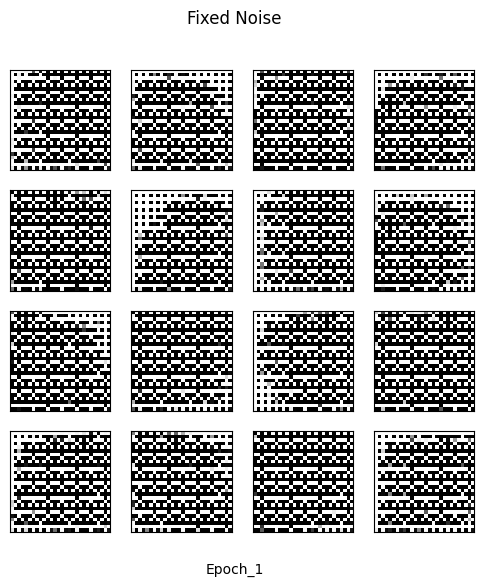

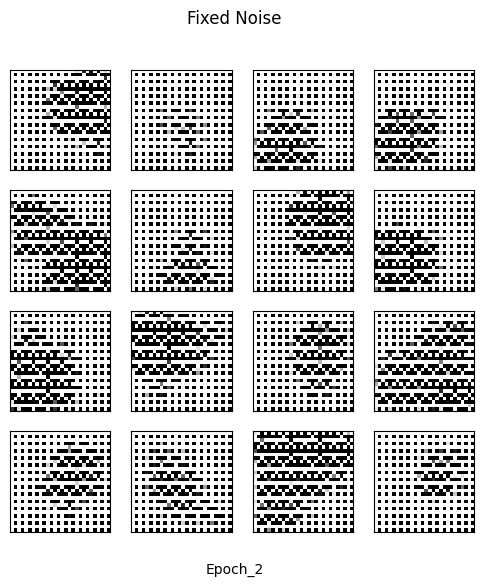

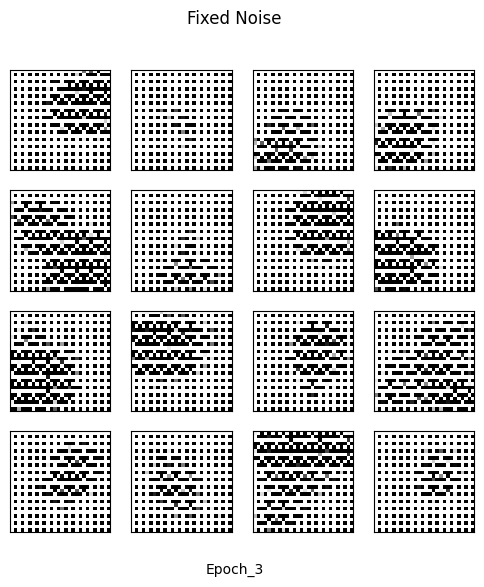

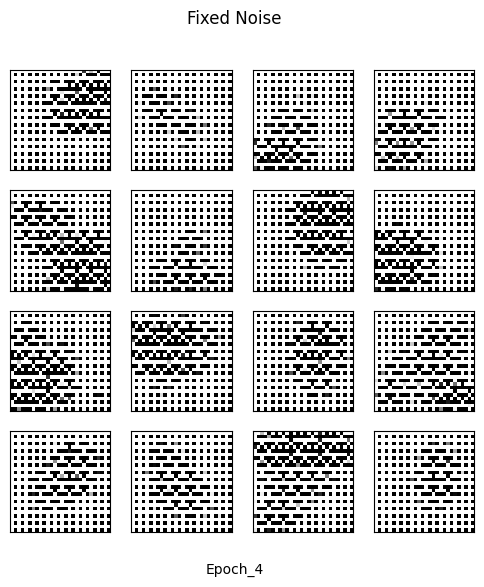

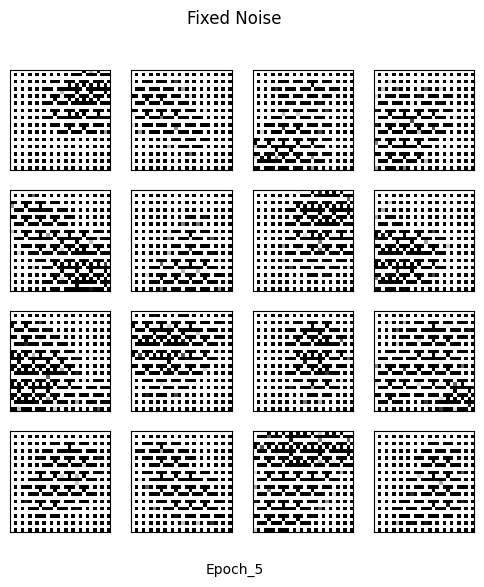

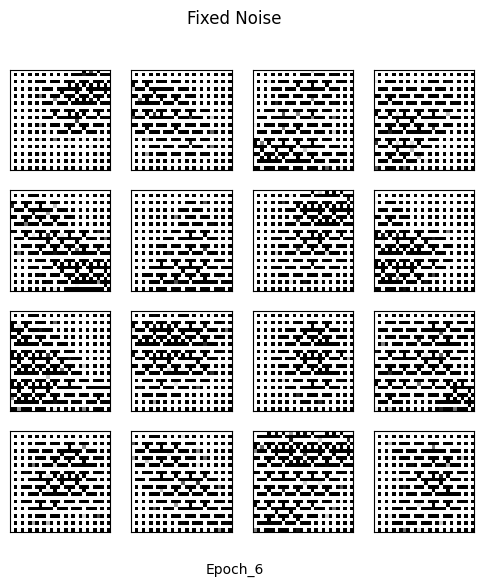

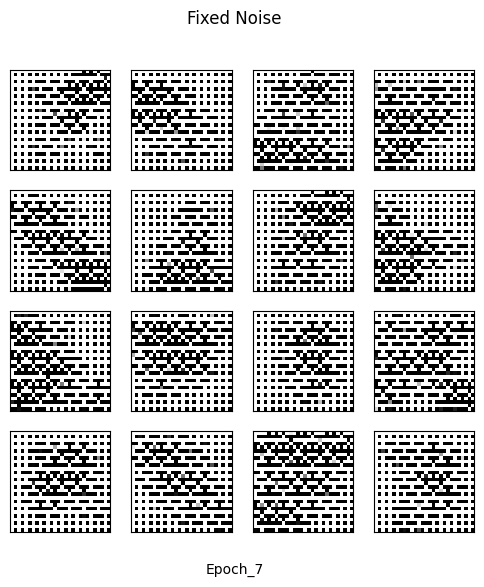

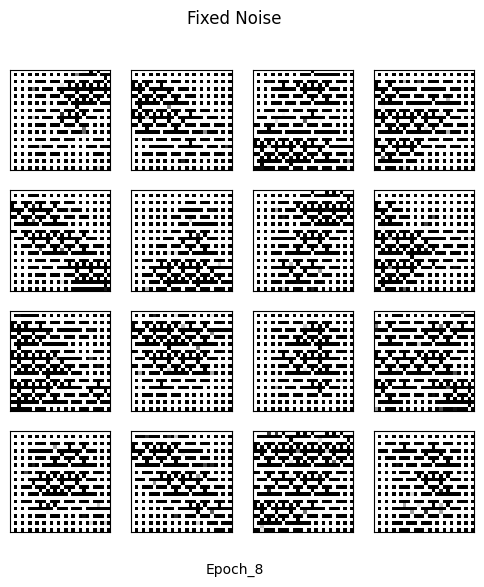

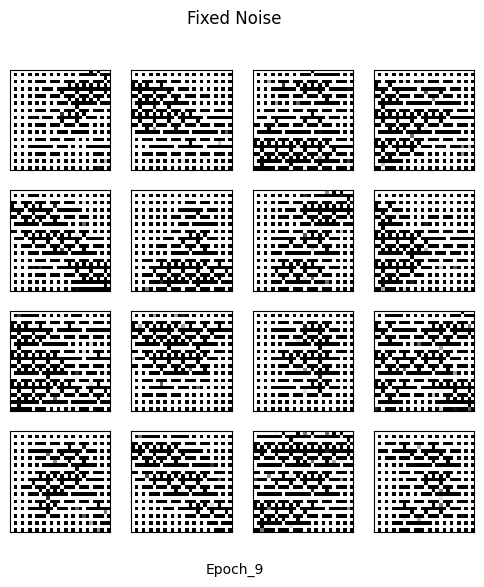

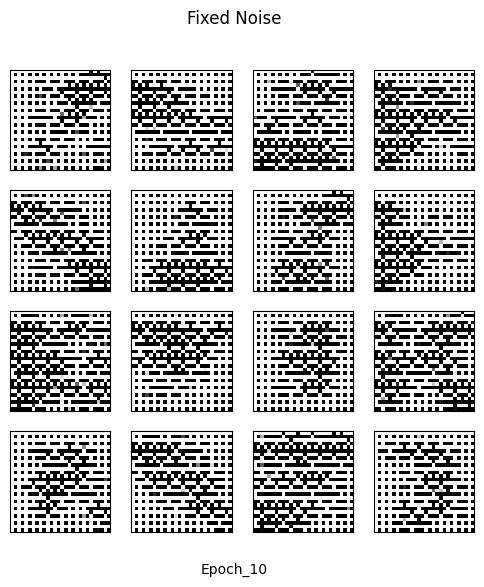

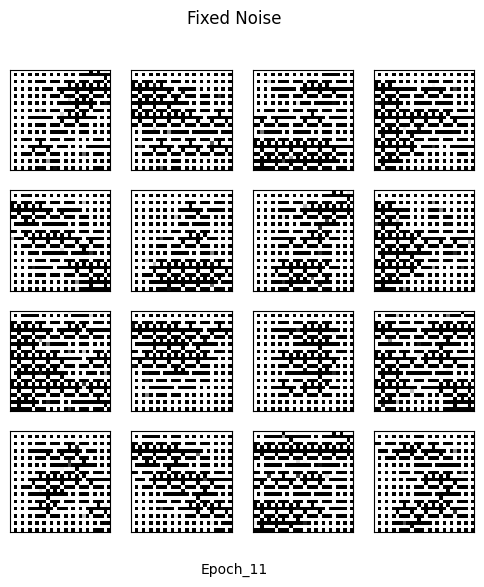

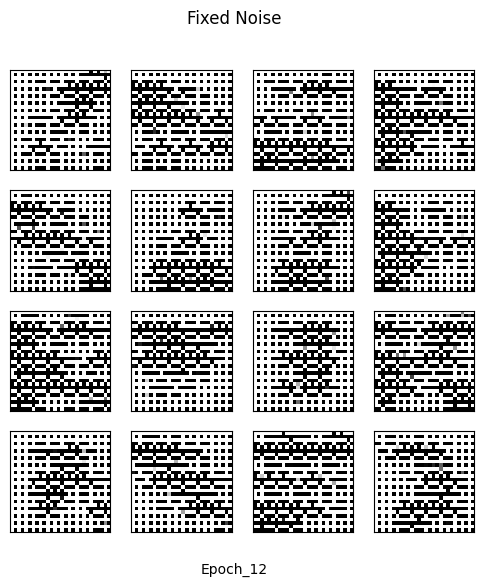

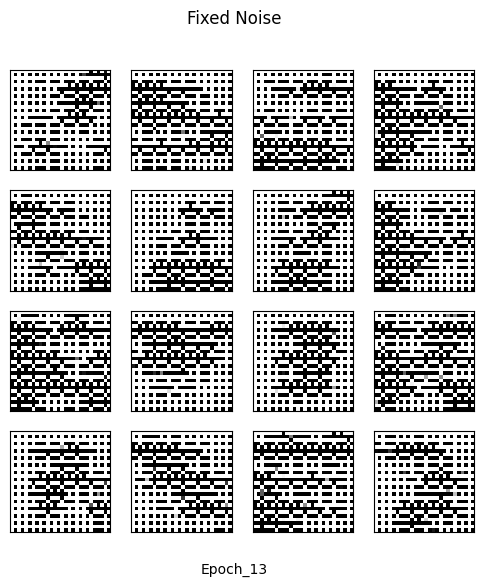

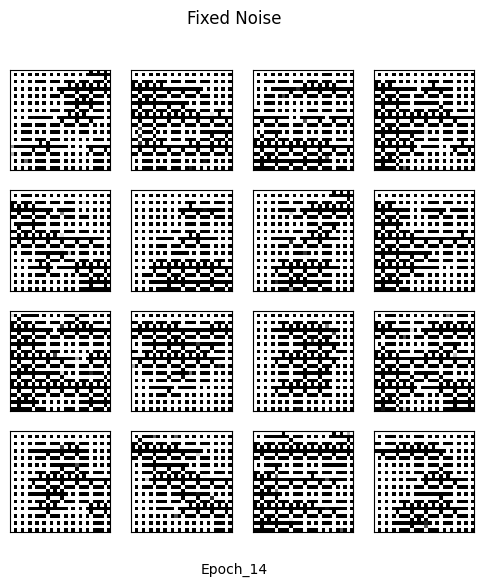

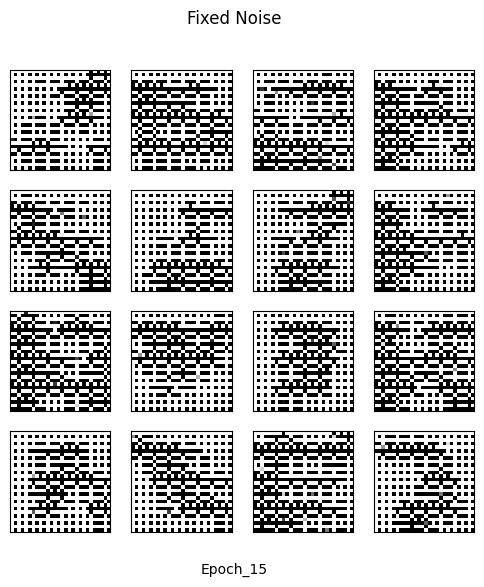

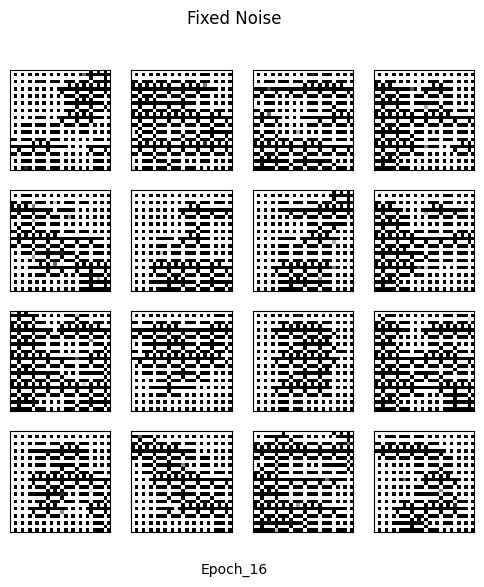

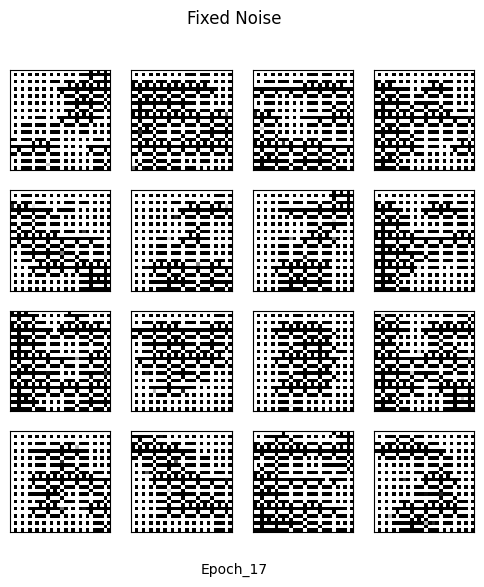

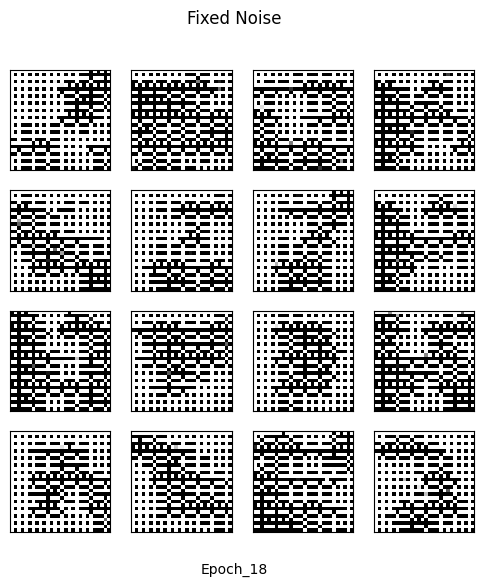

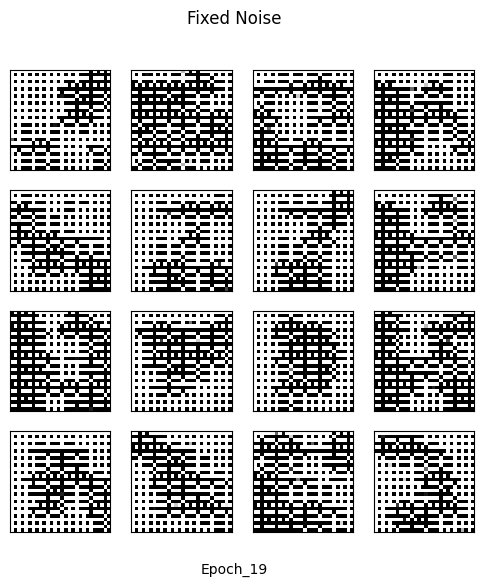

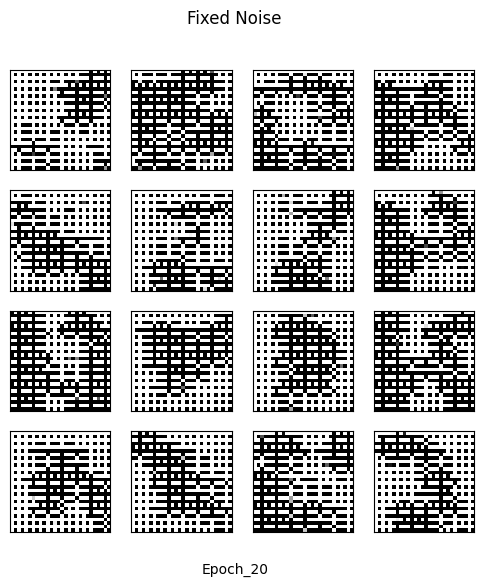

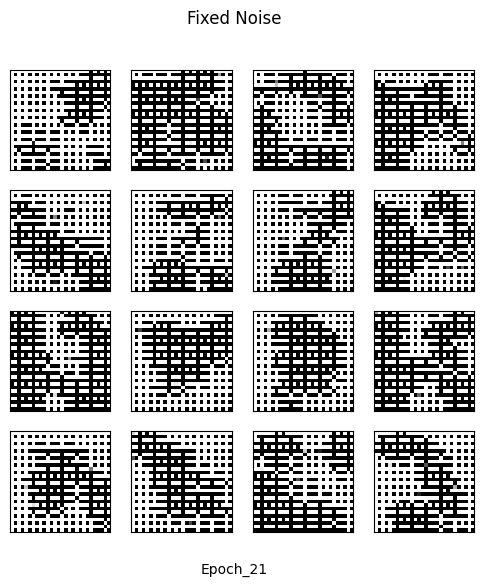

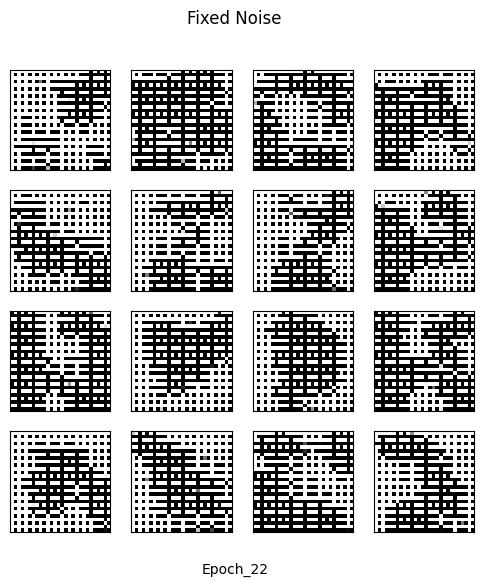

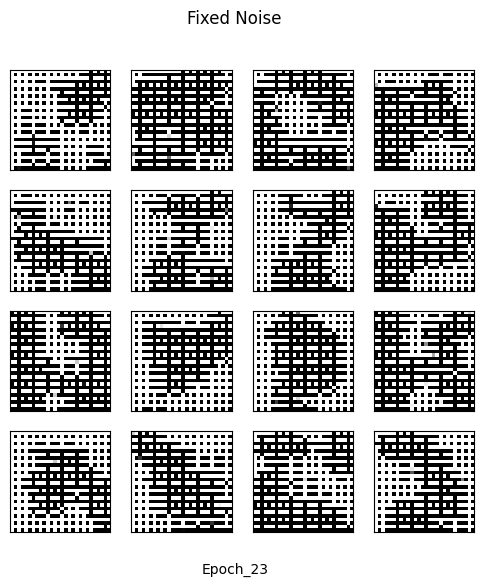

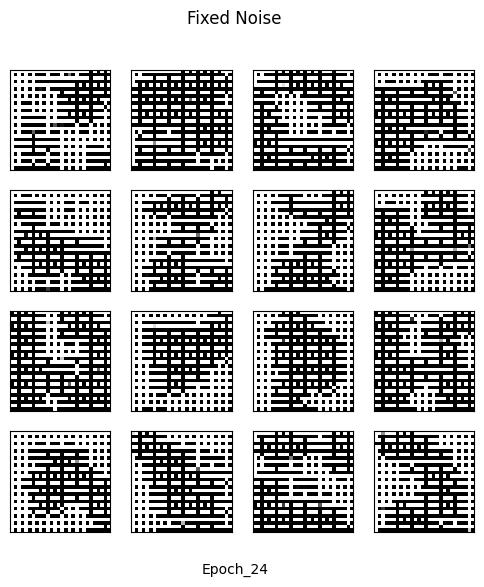

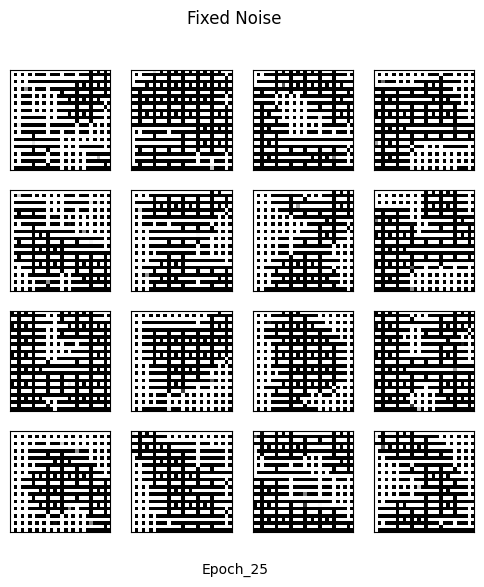

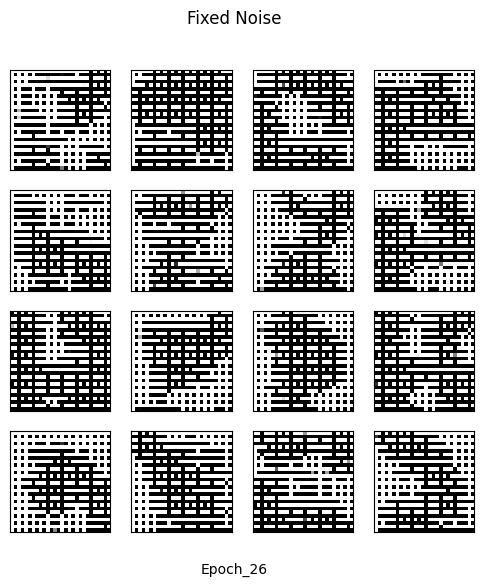

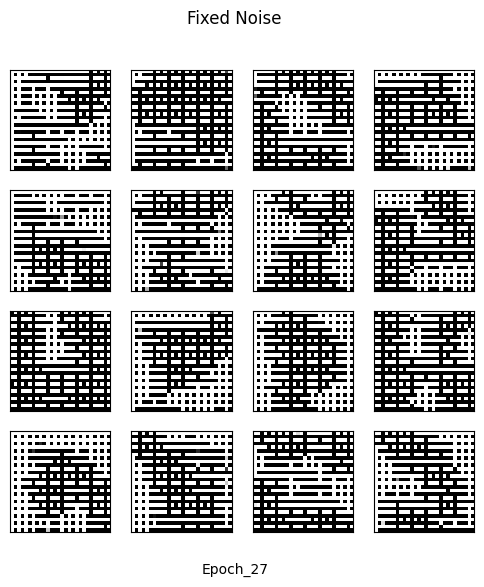

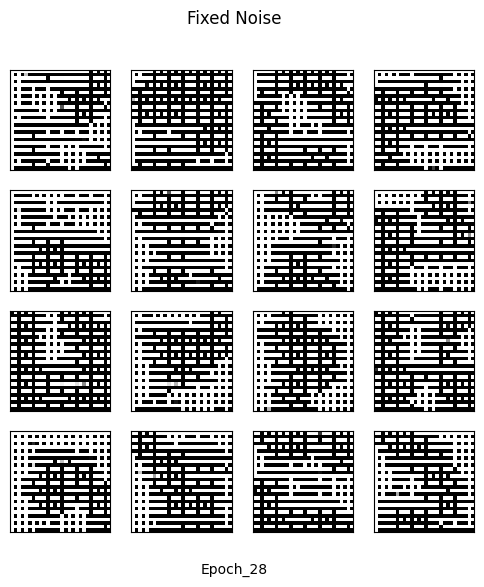

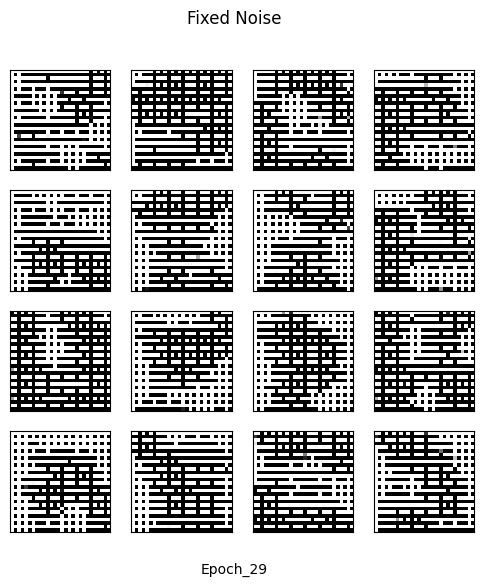

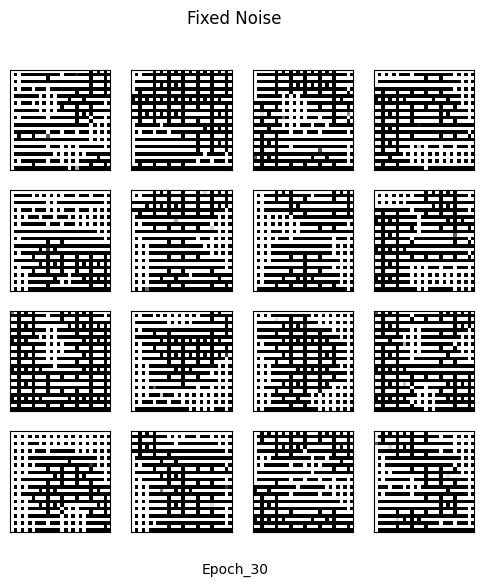

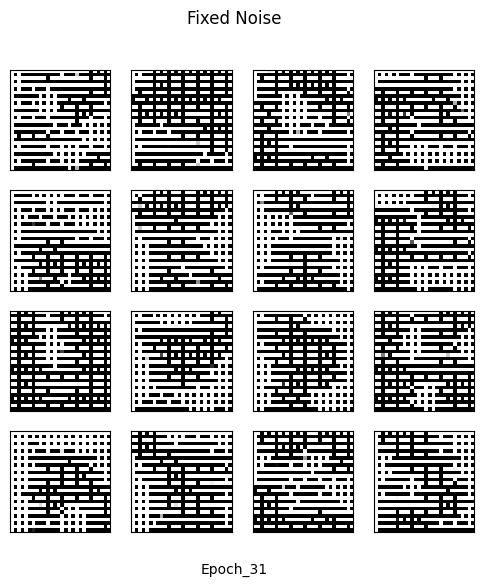

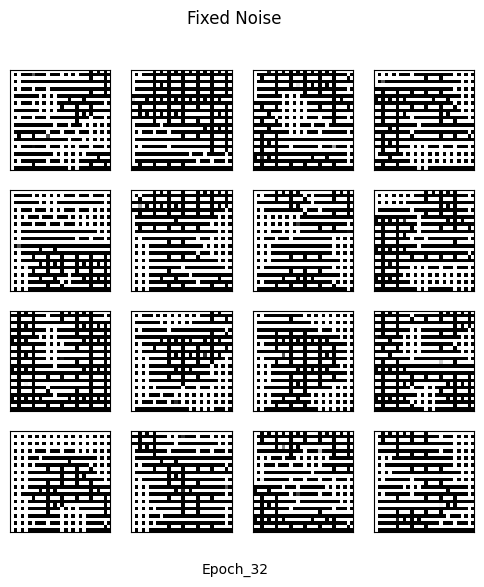

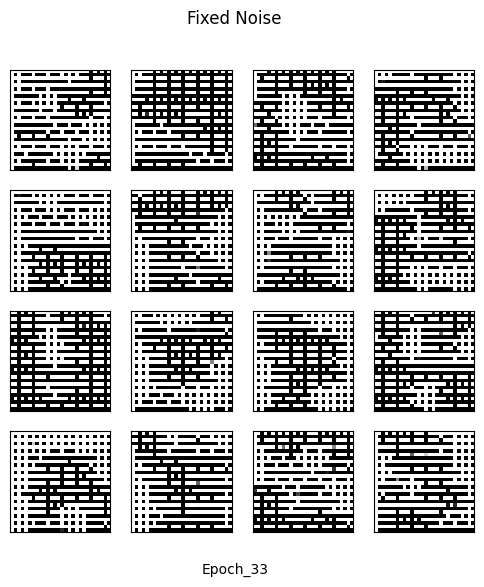

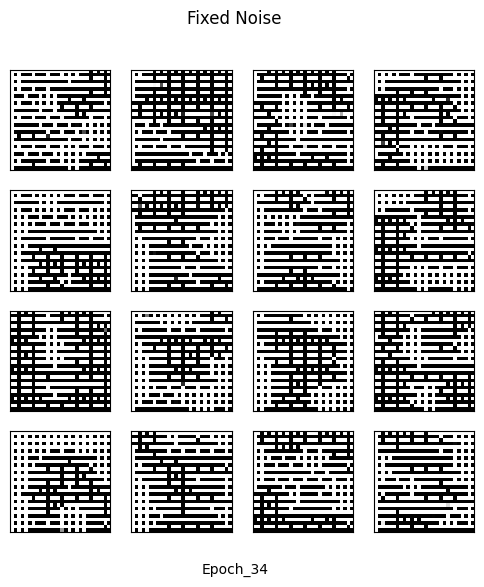

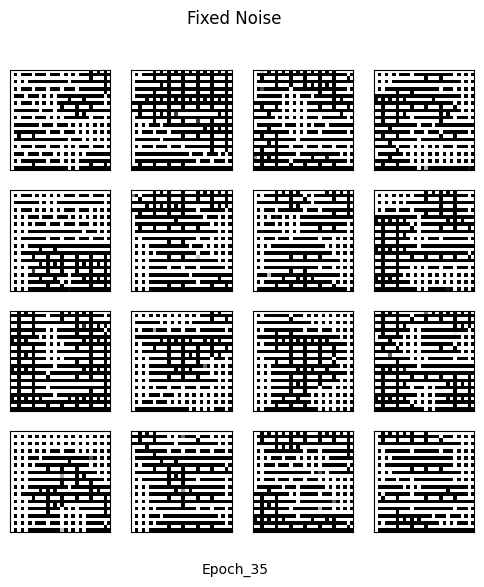

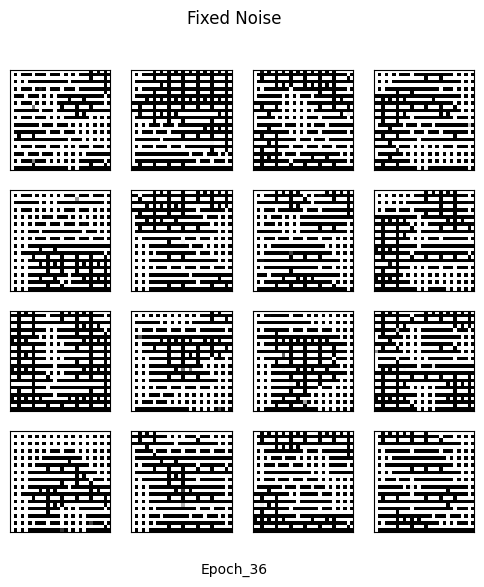

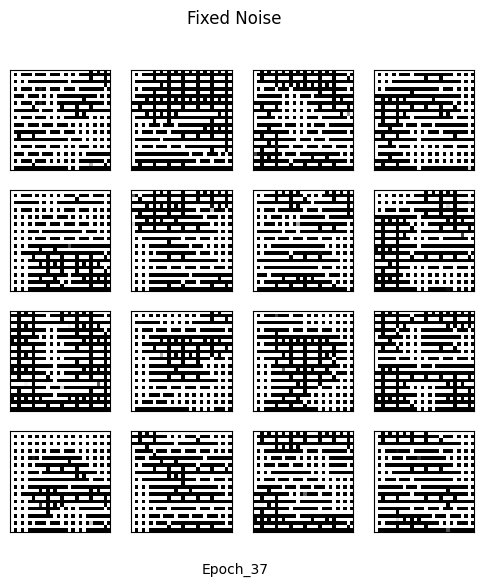

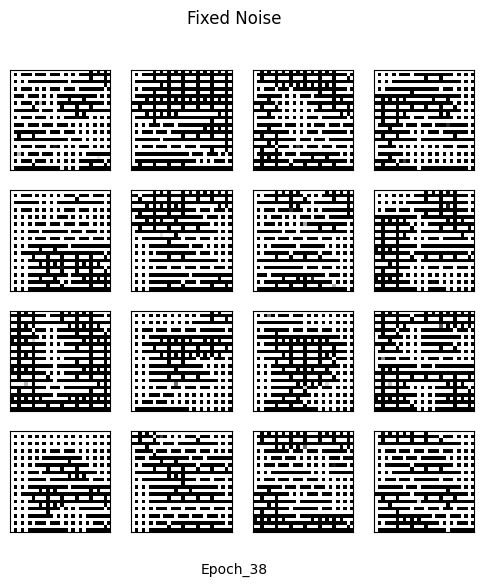

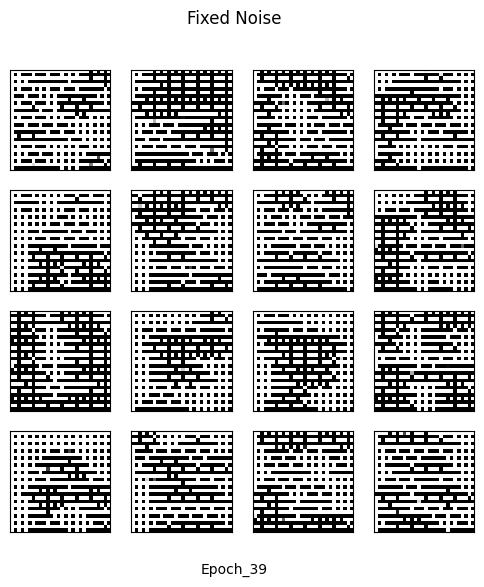

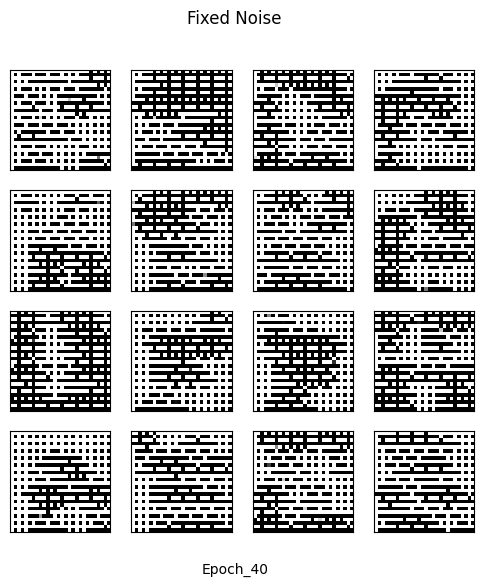

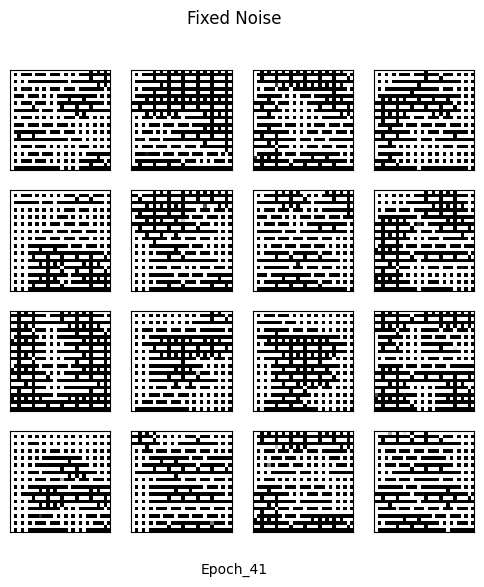

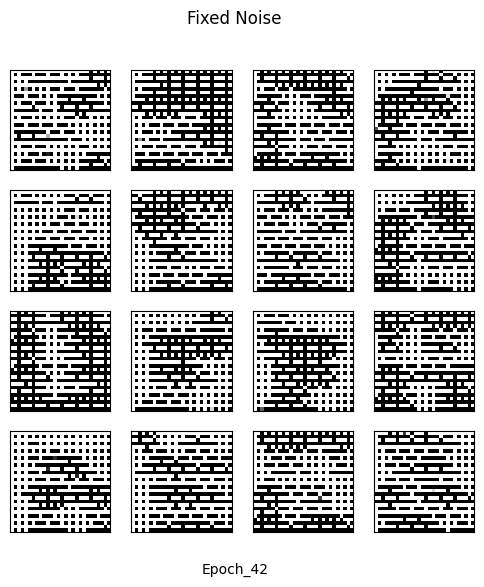

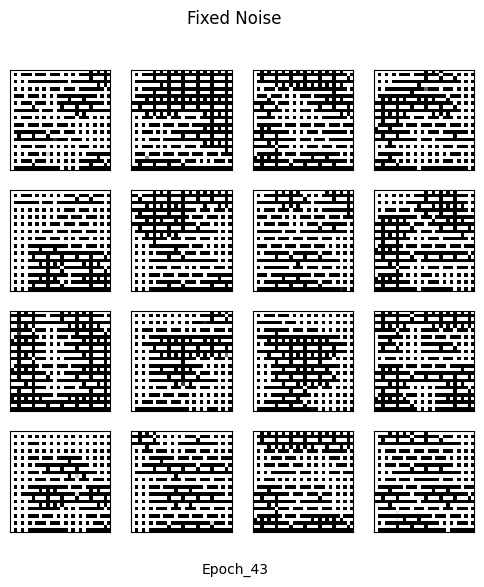

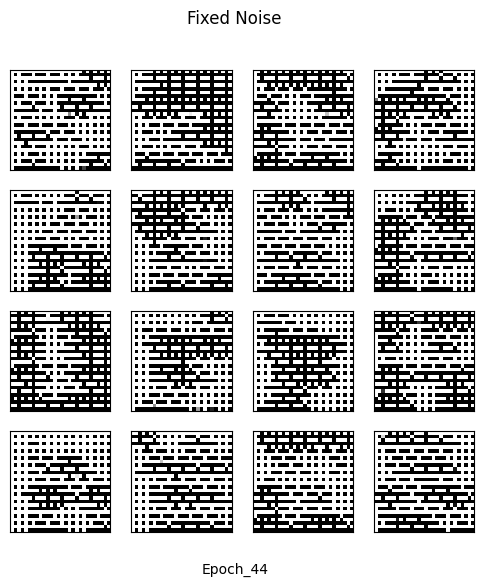

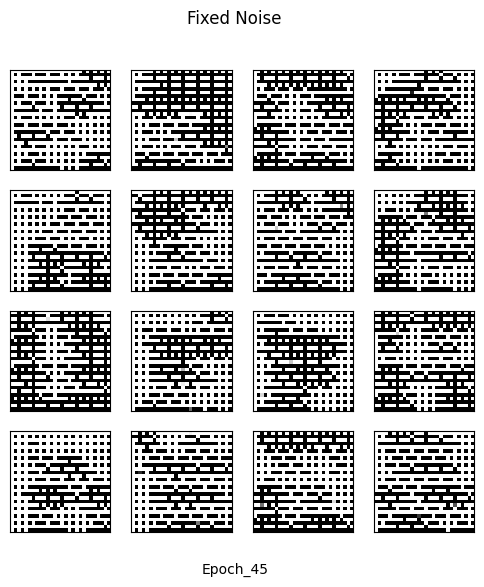

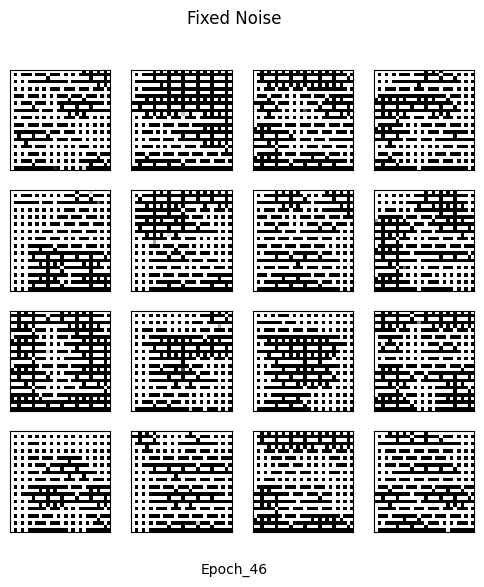

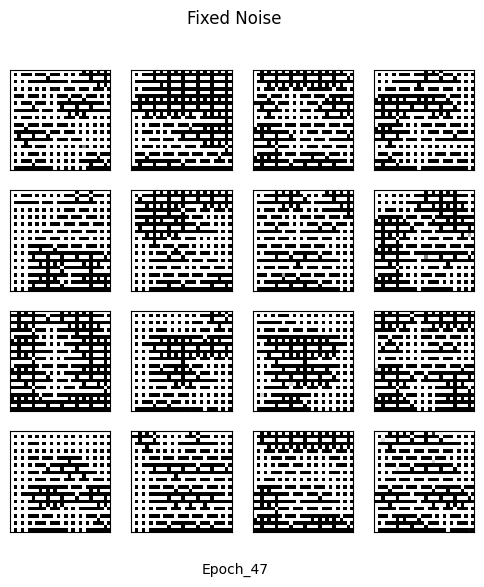

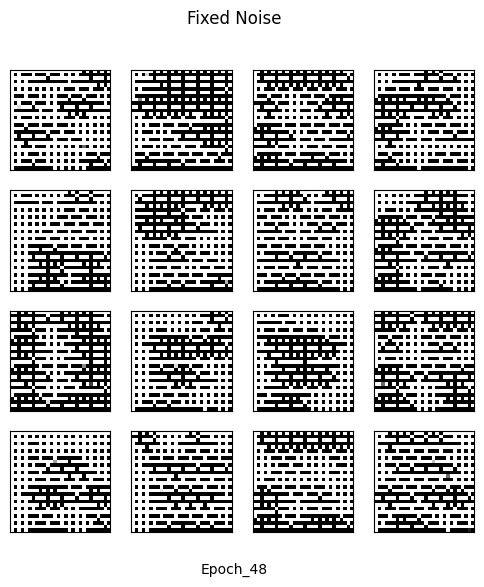

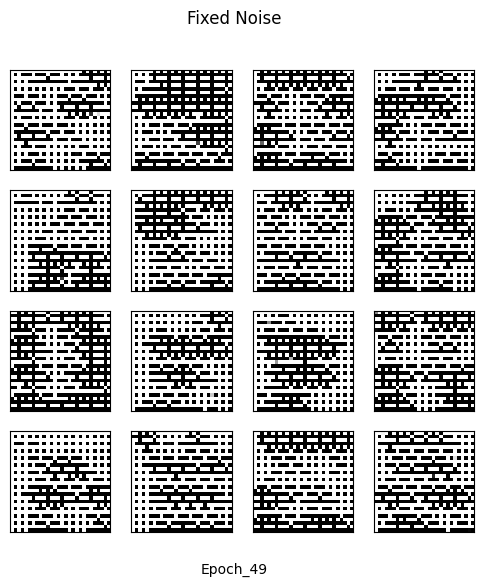

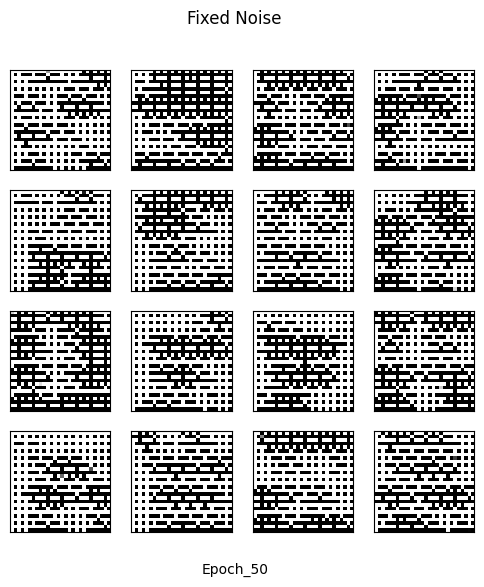

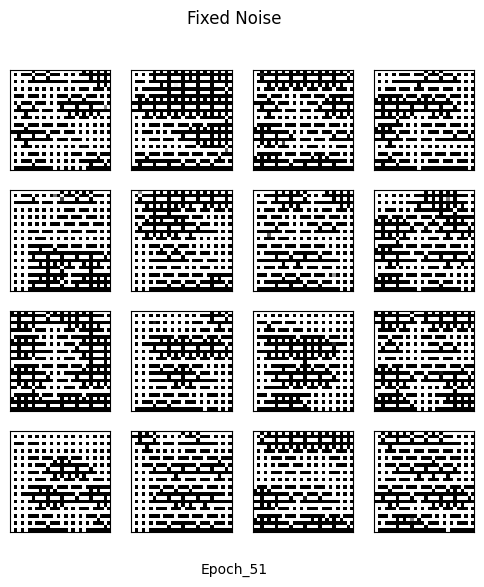

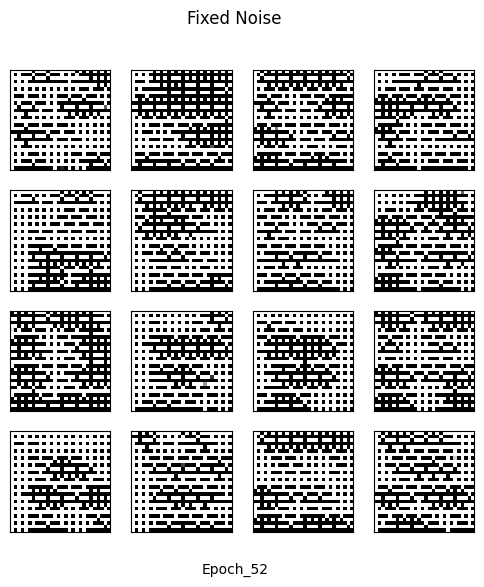

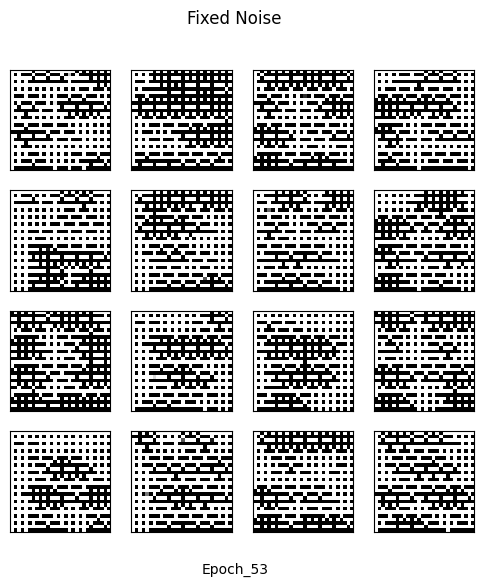

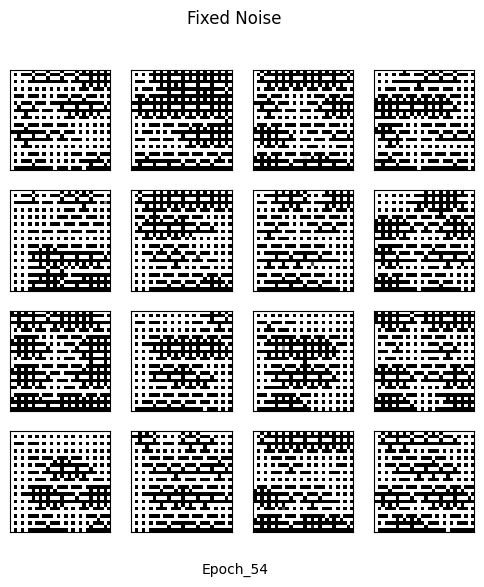

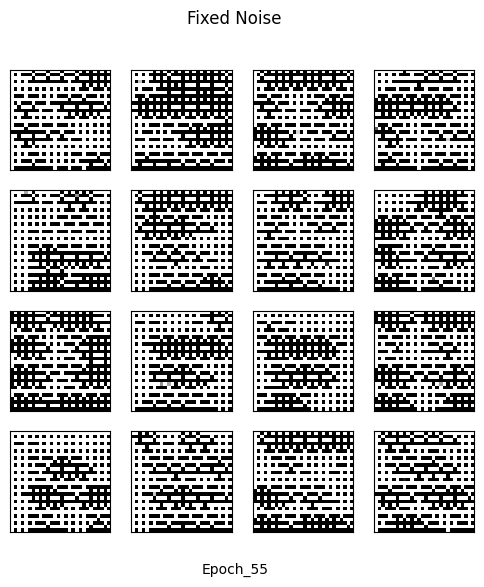

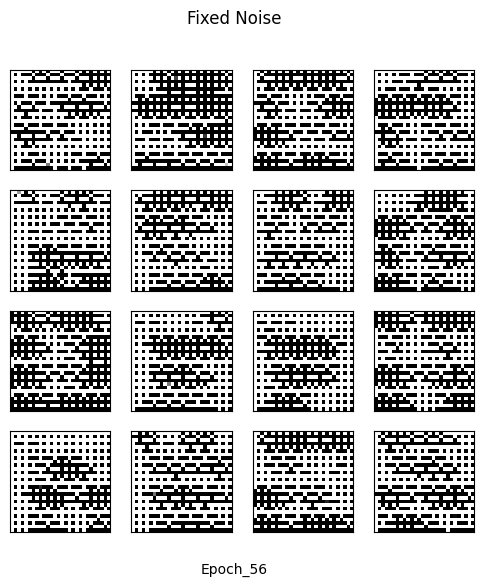

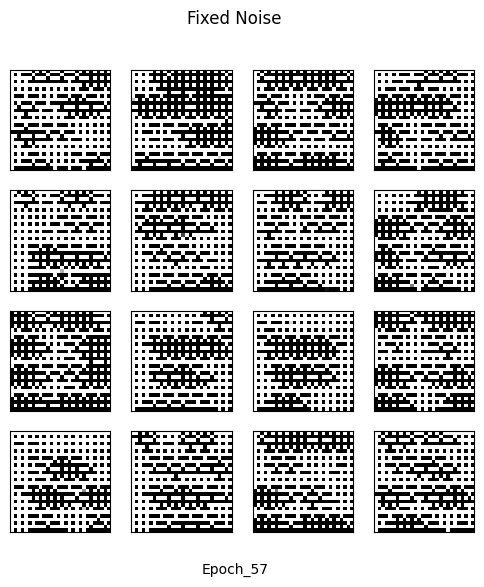

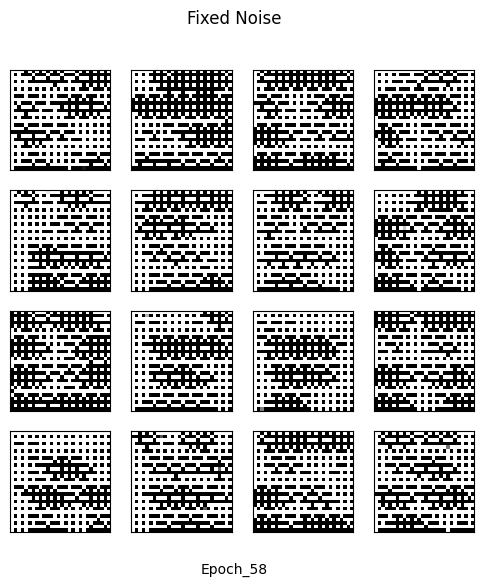

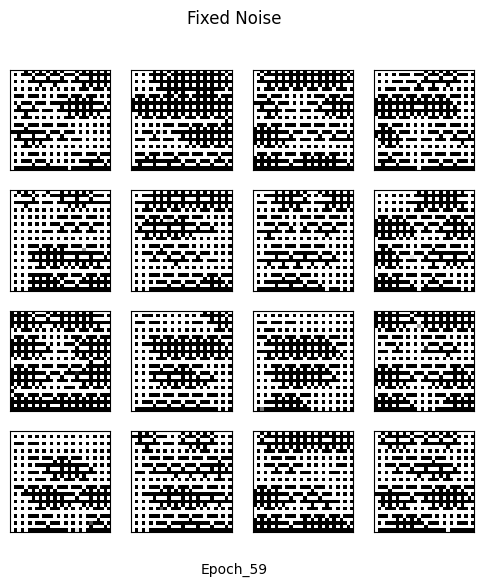

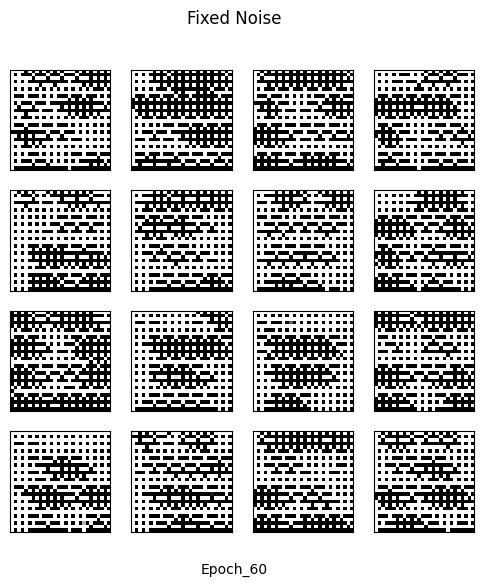

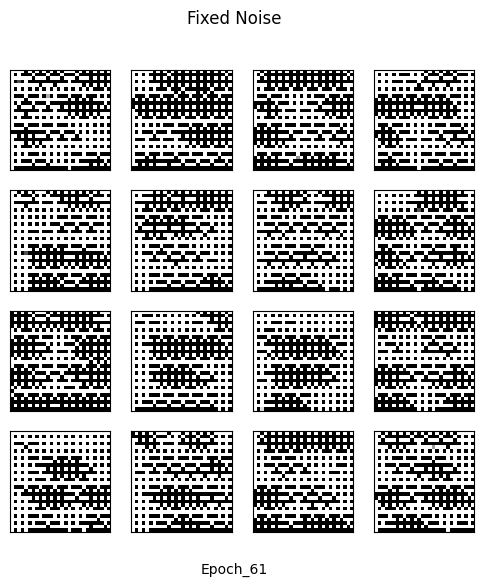

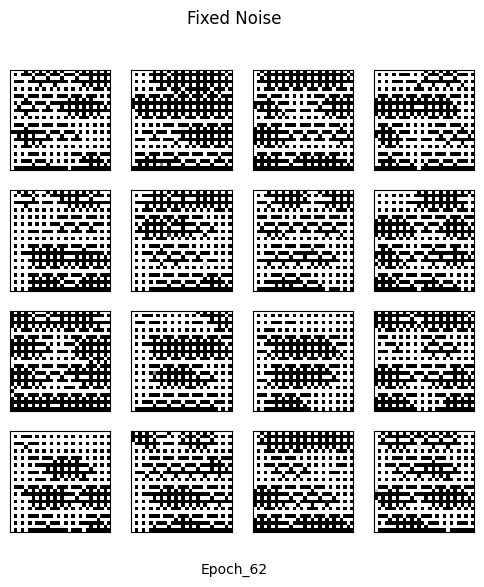

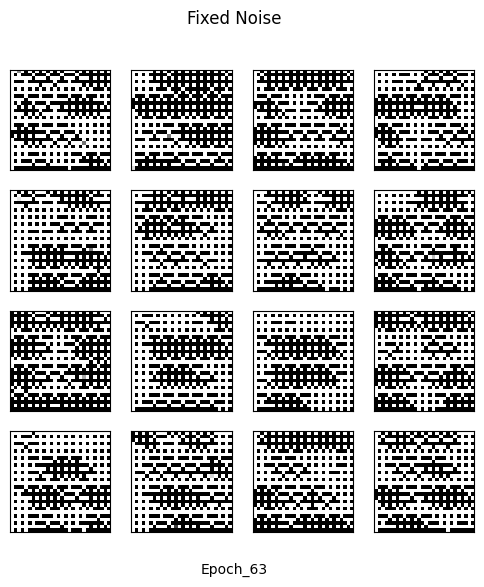

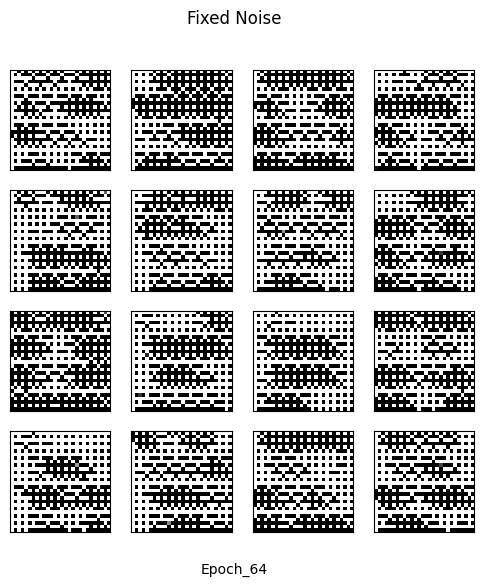

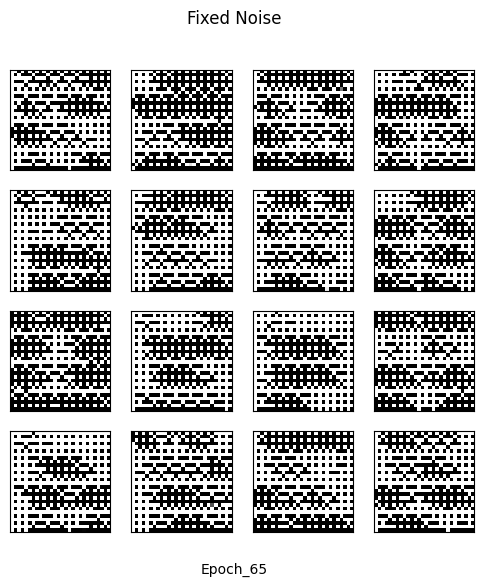

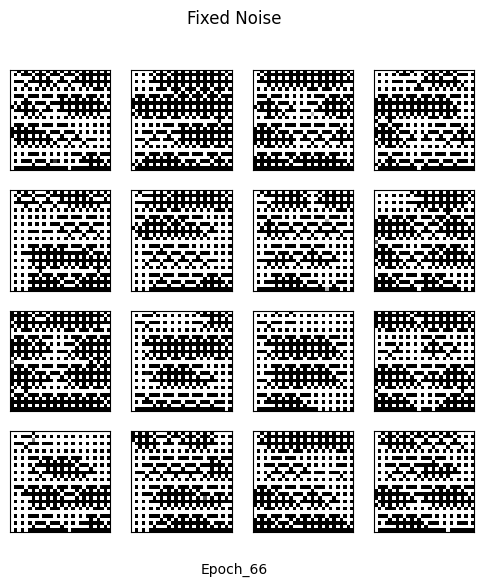

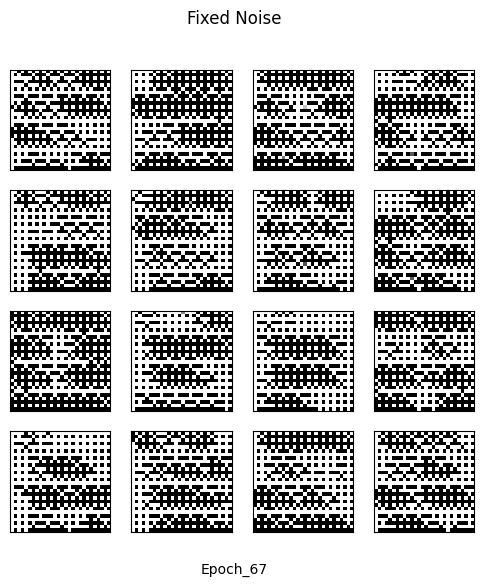

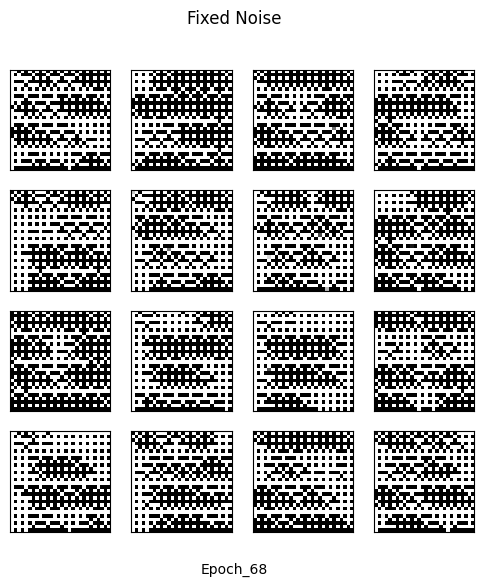

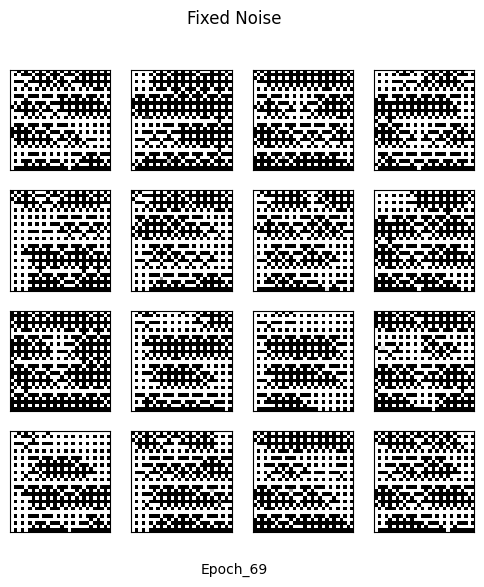

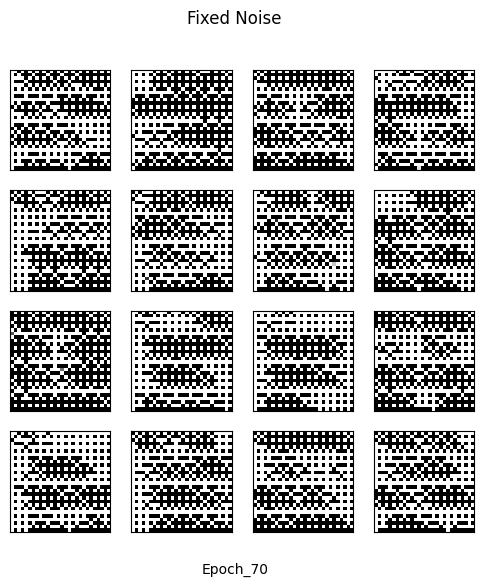

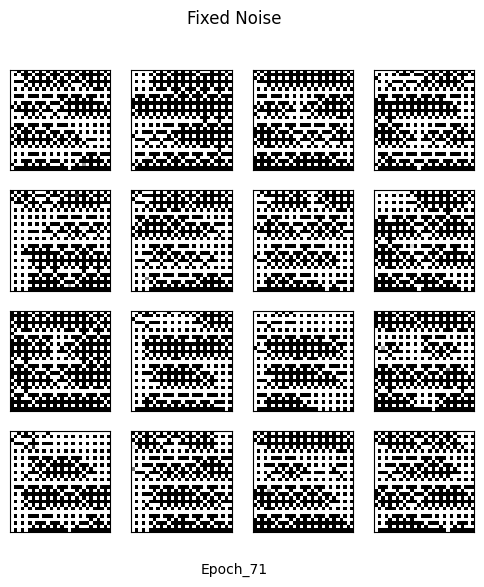

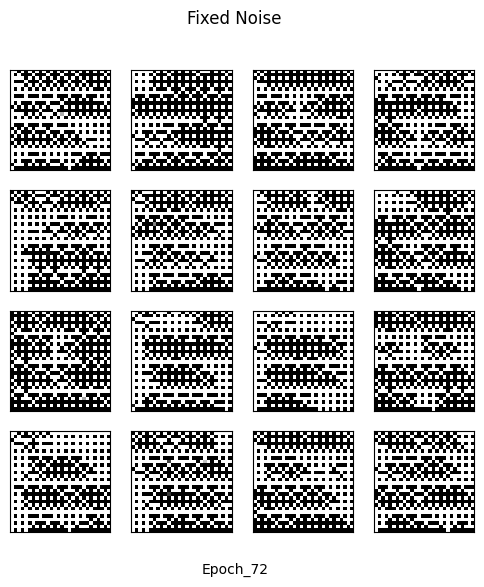

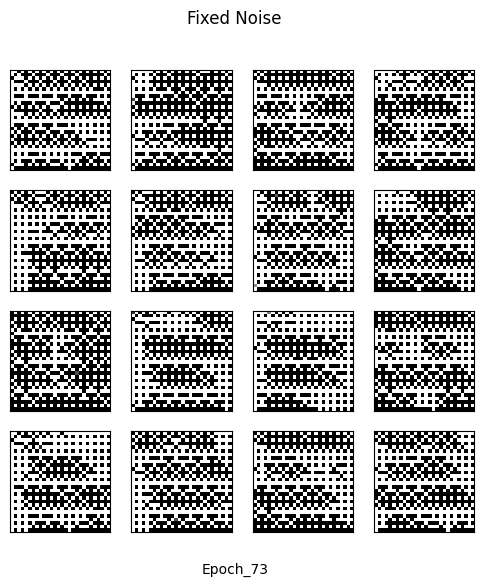

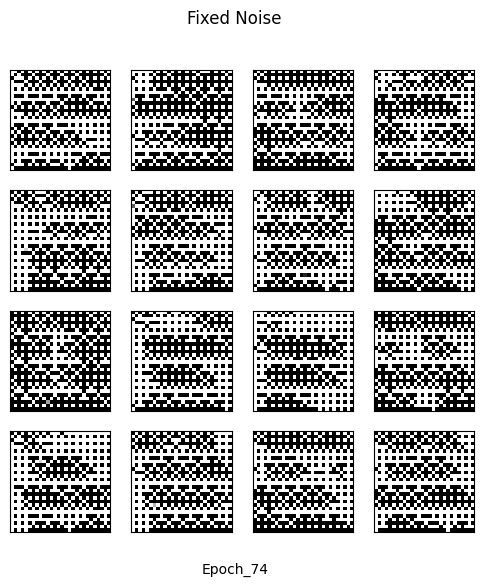

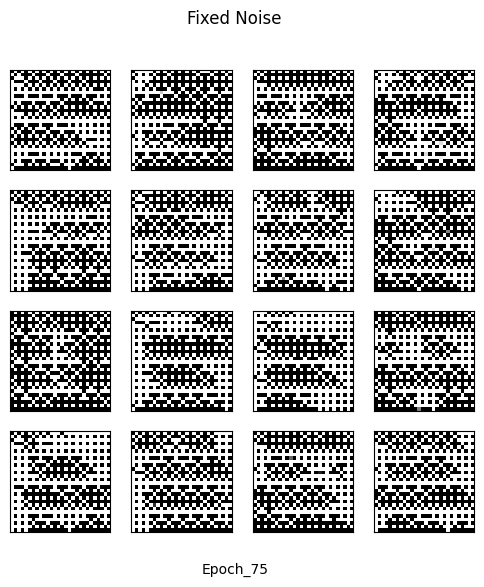

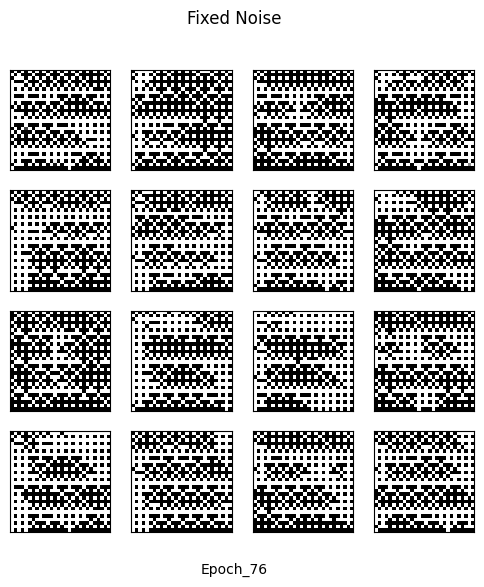

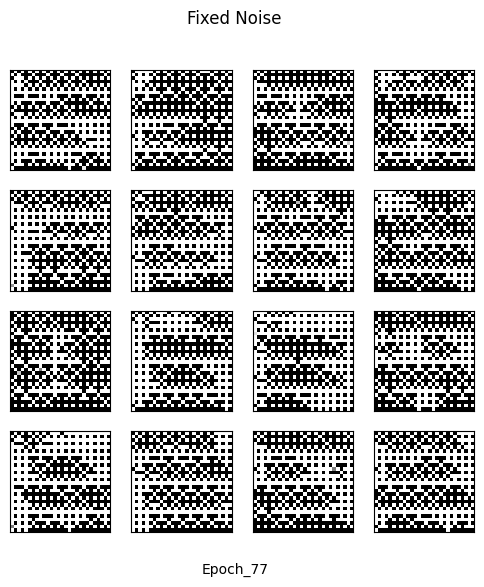

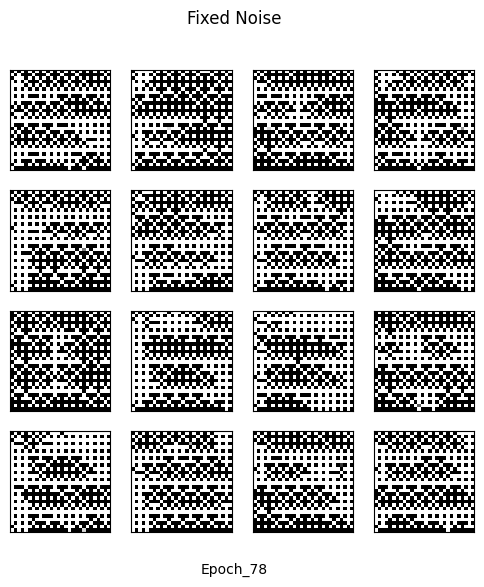

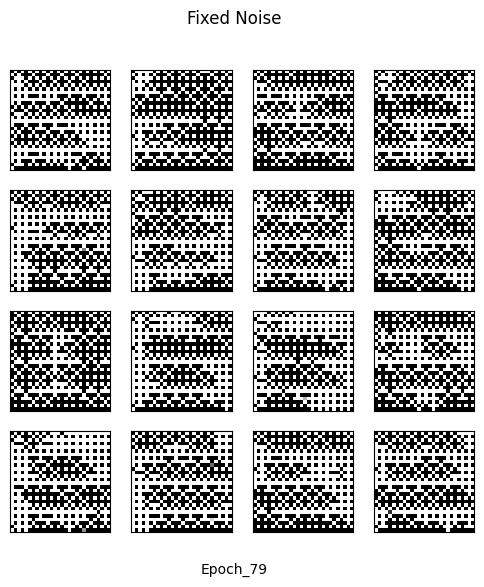

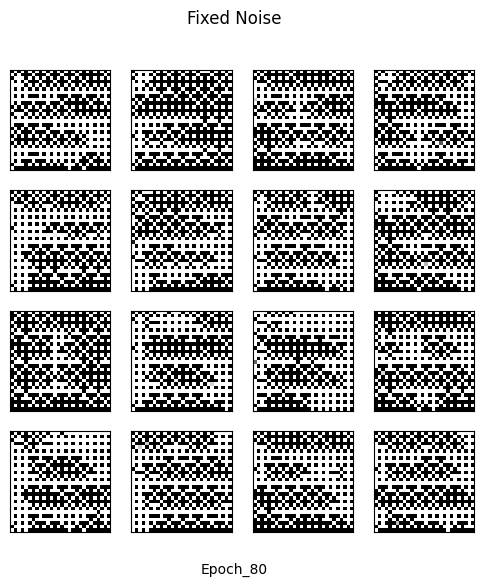

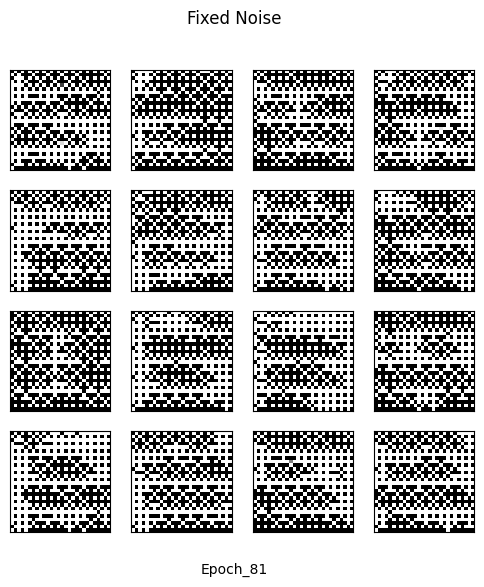

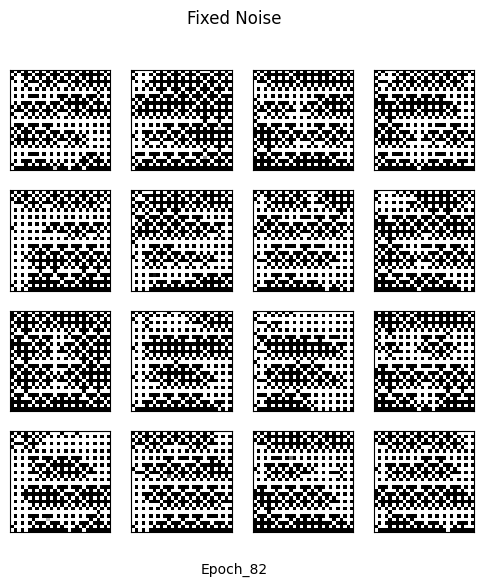

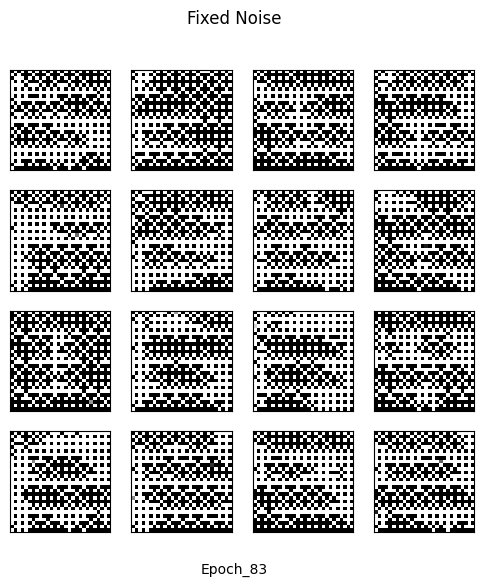

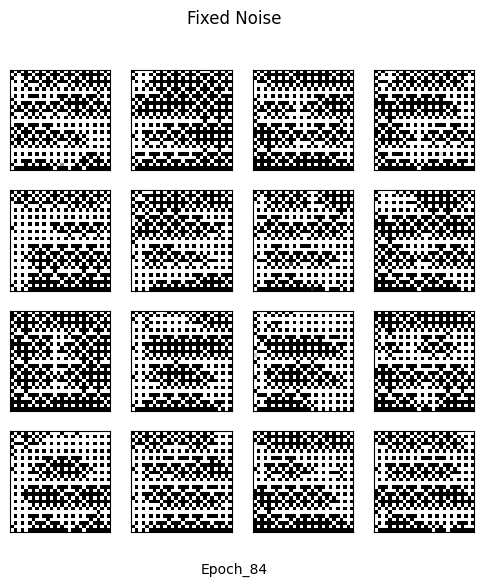

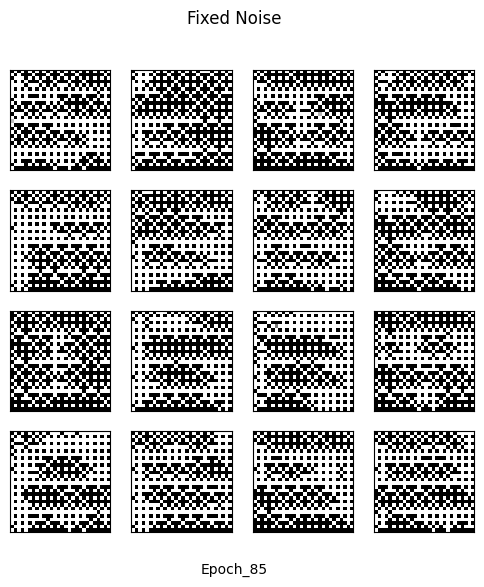

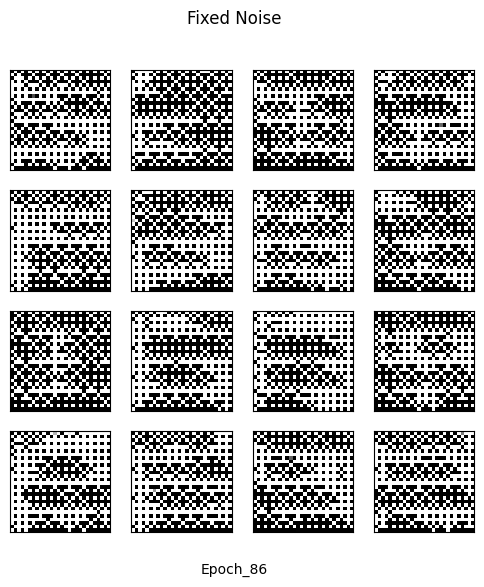

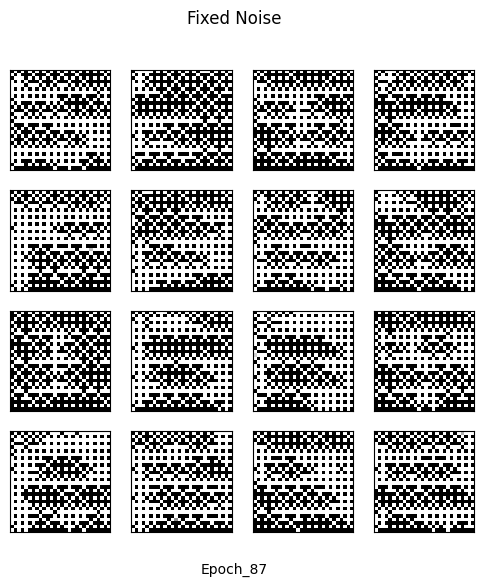

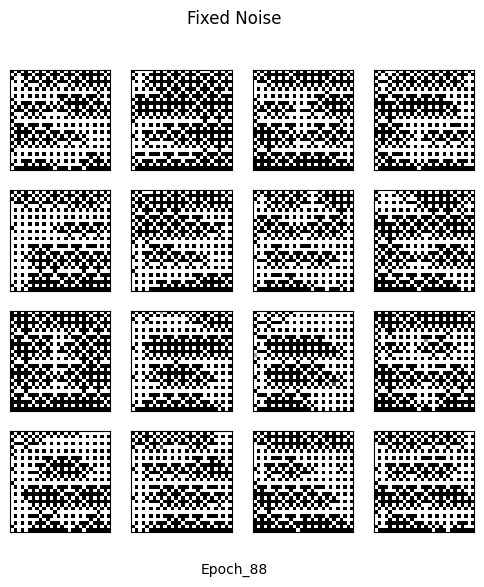

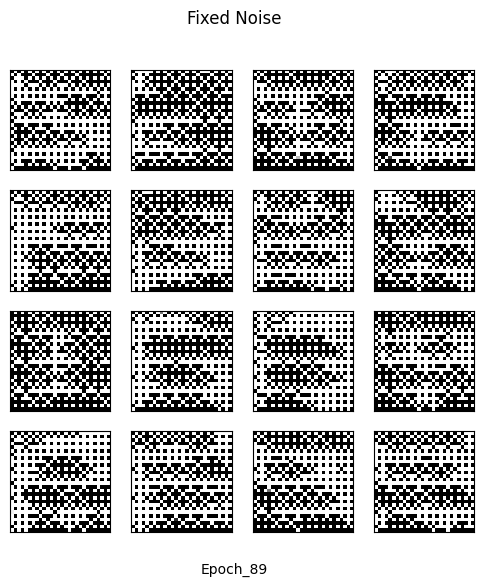

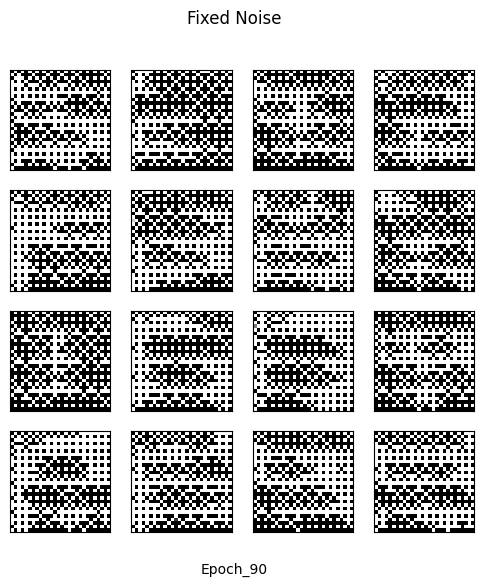

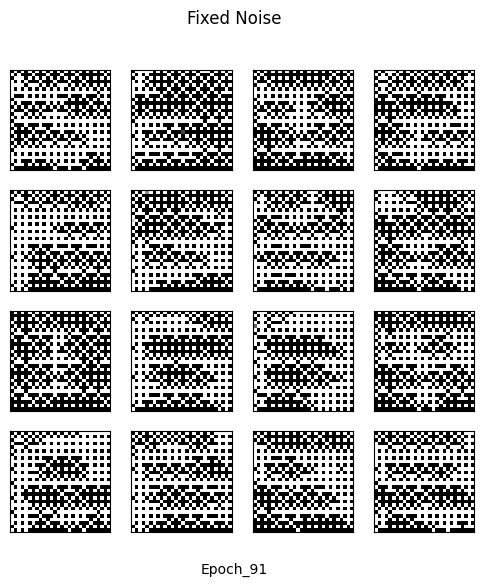

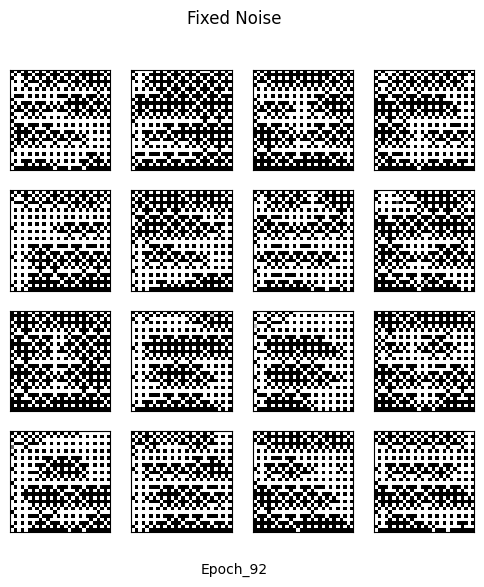

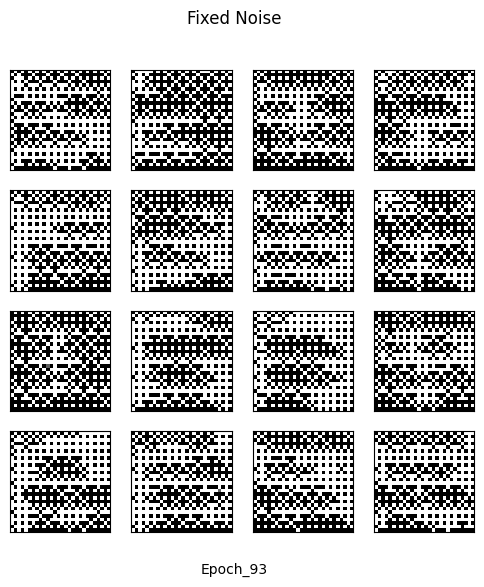

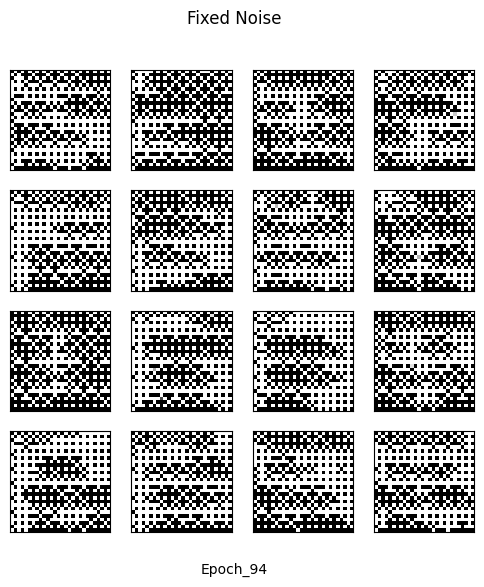

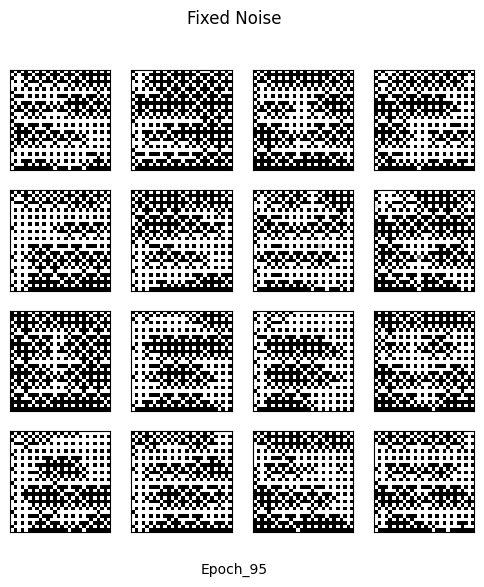

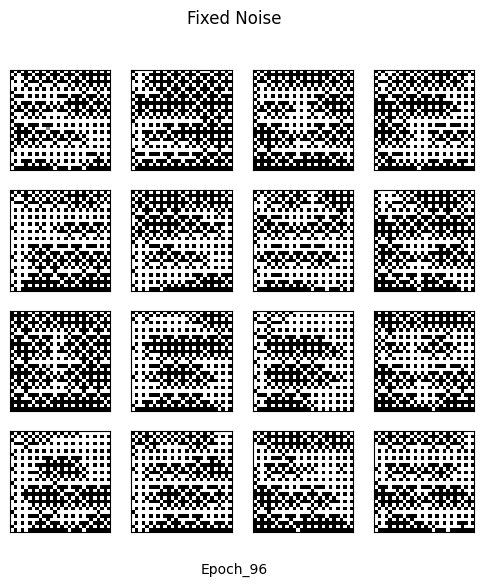

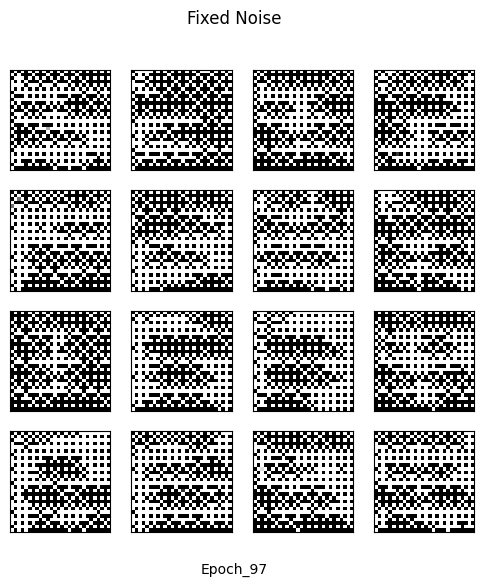

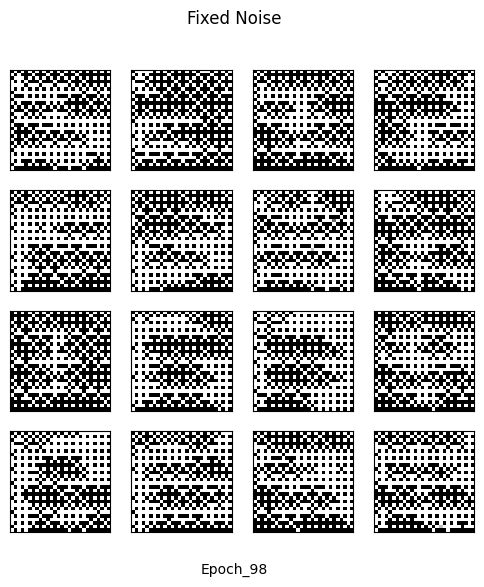

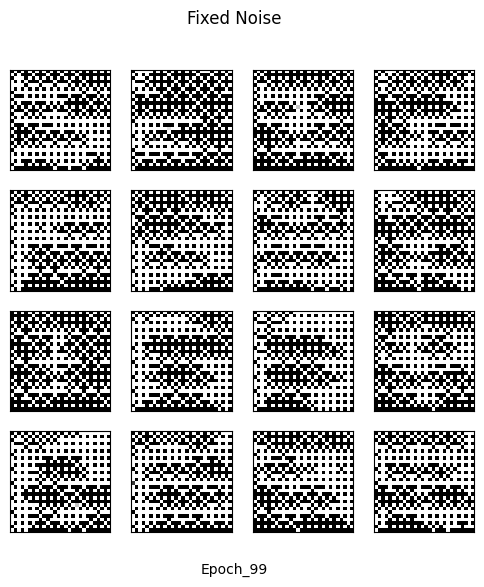

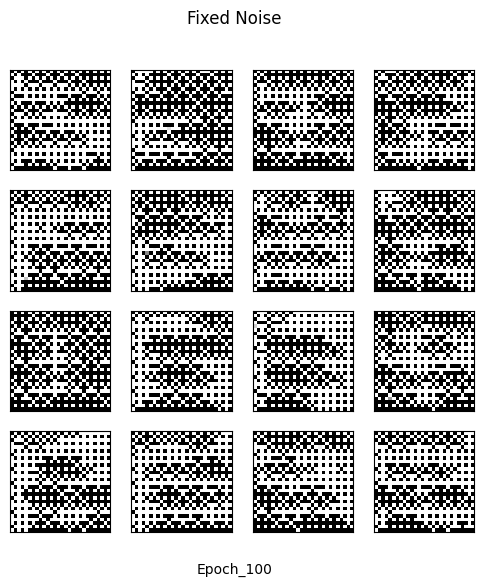

In [ ]:
for epoch in range(opt.num_epochs):
  for i, (real_images, _) in enumerate(train_loader):
      bs = real_images.shape[0]
      netD.zero_grad()
      real_images = real_images.to(device)

      label = torch.full((bs,), real_label, device=device, dtype=torch.float)
      output = netD(real_images)
      lossD_real = criterion(output, label)
      lossD_real.backward()
      D_x = output.mean().item()

      noise = torch.randn(bs, opt.nz, 1, 1, device=device)
      fake_images = netG(noise)

      label.fill_(fake_label)
      output = netD(fake_images.detach())
      lossD_fake = criterion(output, label)
      lossD_fake.backward()
      D_G_z1 = output.mean().item()
      lossD = lossD_real + lossD_fake
      optimizerD.step()
      label.fill_(real_label)
      output = netD(fake_images)
      lossG = criterion(output, label)
      lossG.backward()
      D_G_z2 = output.mean().item()
      optimizerG.step()

      if (i+1)%100 == 0:
          print('Epoch [{}/{}], step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, Discriminator - D(G(x)): {:.2f}, Generator - D(G(x)): {:.2f}'.format(epoch+1, opt.num_epochs,
                                                      i+1, num_batches, lossD.item(), lossG.item(), D_x, D_G_z1, D_G_z2))
  netG.eval()
  generate_images(epoch, opt.output_path, fixed_noise, opt.num_test_samples, netG, device, use_fixed=opt.use_fixed)
  netG.train()

# Save gif:
save_gif(opt.output_path, opt.fps, fixed_noise=opt.use_fixed)